<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
iris = datasets.load_iris()

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
inertias = []
n_clusters = range(1,10)
for n in n_clusters:
    print("Evaluando n_clusters = ", n)
    knn_model = KMeans(n_clusters = n)
    knn_model.fit(df)
    inertias.append(knn_model.inertia_)

Evaluando n_clusters =  1
Evaluando n_clusters =  2
Evaluando n_clusters =  3
Evaluando n_clusters =  4
Evaluando n_clusters =  5
Evaluando n_clusters =  6
Evaluando n_clusters =  7
Evaluando n_clusters =  8
Evaluando n_clusters =  9


In [10]:
inertias

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.066035353535376,
 34.42019178628389,
 30.859221634503605,
 28.042265254353516]

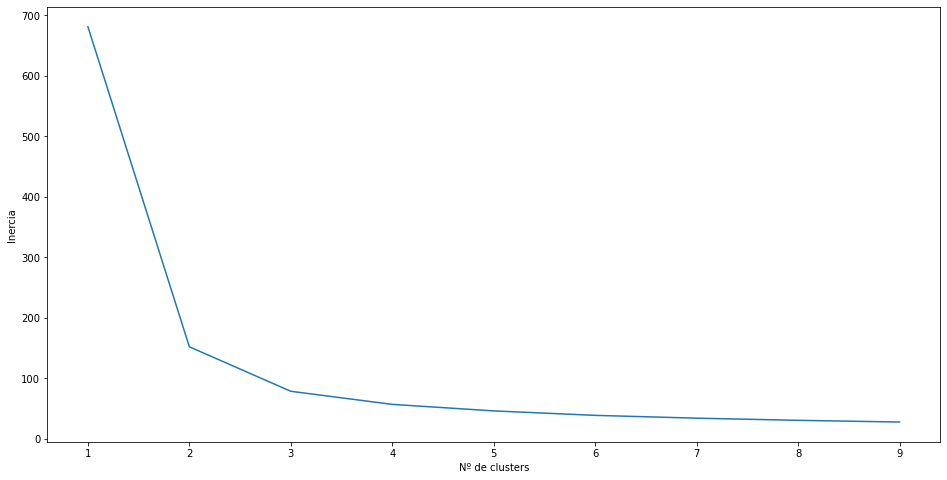

In [11]:
plt.figure(figsize=(16,8))
plt.plot(n_clusters, inertias)
plt.xlabel("Nº de clusters")
plt.ylabel("Inercia")
plt.show()

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
knn_final = KMeans(n_clusters=3)
knn_final.fit(df)

KMeans(n_clusters=3)

In [19]:
df["cluster_id"] = knn_final.predict(df)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [20]:
df["iris_class"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id,iris_class
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


Text(0.5, 1.0, 'Cluster ID')

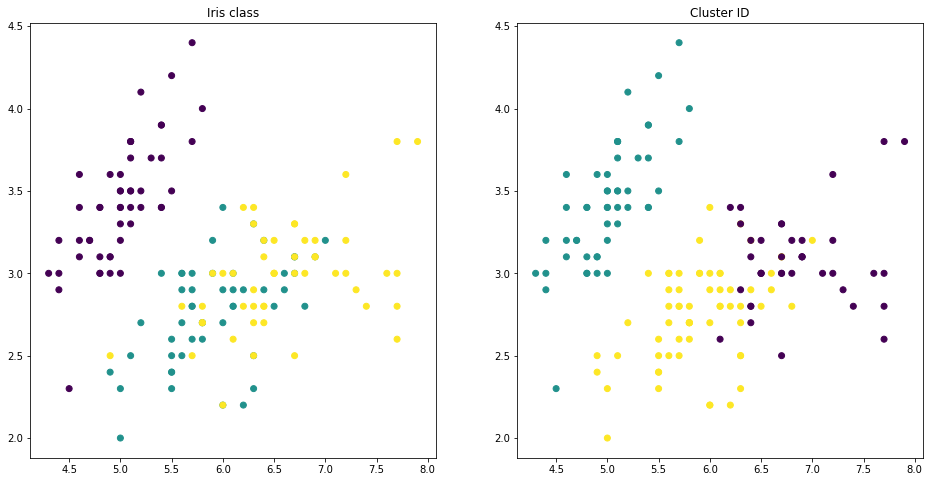

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = df.iris_class)
axes[0].set_title("Iris class")

axes[1].scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = df.cluster_id)
axes[1].set_title("Cluster ID")